# k-nearest neighbours

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [4]:
x = np.array(np.random.randint(0, 5, size = 12))

In [5]:
x = x.reshape(6,2)

In [6]:
y = np.array(np.random.randint(6, 12, size = 12))

In [7]:
y = y.reshape(6,2)

In [8]:
y = y.reshape(6,2)

In [9]:
z = np.vstack((x, y))
z

array([[ 4,  0],
       [ 3,  1],
       [ 0,  4],
       [ 0,  1],
       [ 4,  2],
       [ 2,  0],
       [ 8, 11],
       [ 6,  8],
       [ 6, 10],
       [10,  6],
       [ 6,  6],
       [ 7,  6]])

In [10]:
cl = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

In [11]:
knn.fit(z, cl)

KNeighborsClassifier(n_neighbors=3)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
knn.predict([[8,12]])

array([1])

In [14]:
knn.predict([[1,3]])

array([0])

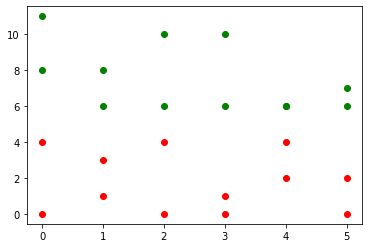

In [15]:
plt.plot(x, 'ro', color = "red")
plt.plot(y, 'ro', color = "green")

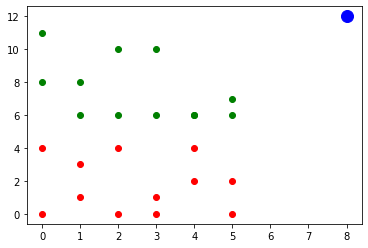

In [16]:
plt.plot(x, 'ro', color = "red")
plt.plot(y, 'ro', color = "green")
plt.plot(8,12, 'ro', color = "blue", markersize = 12)

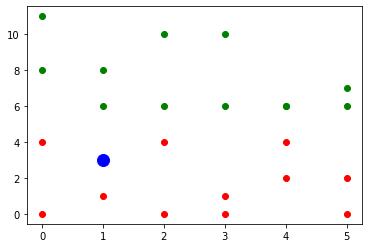

In [17]:
plt.plot(x, 'ro', color = "red")
plt.plot(y, 'ro', color = "green")
plt.plot(1,3, 'ro', color = "blue", markersize = 12)

## vediamo un esempio su un dataset più grande 

In [18]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [20]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = 0)

In [21]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class"]

In [22]:
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width        Class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
5           4.6          3.4           1.4          0.3  Iris-setosa
6           5.0          3.4           1.5          0.2  Iris-setosa
7           4.4          2.9           1.4          0.2  Iris-setosa
8           4.9          3.1           1.5          0.1  Iris-setosa
9           5.4          3.7           1.5          0.2  Iris-setosa


In [23]:
df2 = df.iloc[:, 0:4]

In [24]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Class, dtype: int64

In [25]:
df2.shape

(149, 4)

In [26]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

In [27]:
scaled = scaler.fit_transform(df2)

In [28]:
df_scaled = pd.DataFrame(scaled)

In [29]:
print(df_scaled.head())

          0         1         2         3
0  0.166667  0.416667  0.067797  0.041667
1  0.111111  0.500000  0.050847  0.041667
2  0.083333  0.458333  0.084746  0.041667
3  0.194444  0.666667  0.067797  0.041667
4  0.305556  0.791667  0.118644  0.125000


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, df['Class'], test_size = 0.3)

In [32]:
y_test.shape

(45,)

In [33]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# KNeighborsClassifier()

In [35]:
pred = knn.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(confusion_matrix(y_test, pred))

[[15  0  0]
 [ 0 16  0]
 [ 0  3 11]]


In [38]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [42]:
err = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    err.append(np.mean(pred_i != y_test))

In [47]:
i=3
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(x_train, y_train)
pred_i = knn.predict(x_test)
err = np.mean(pred_i != y_test)
err

0.06666666666666667

Text(0, 0.5, 'Tasso di errore')

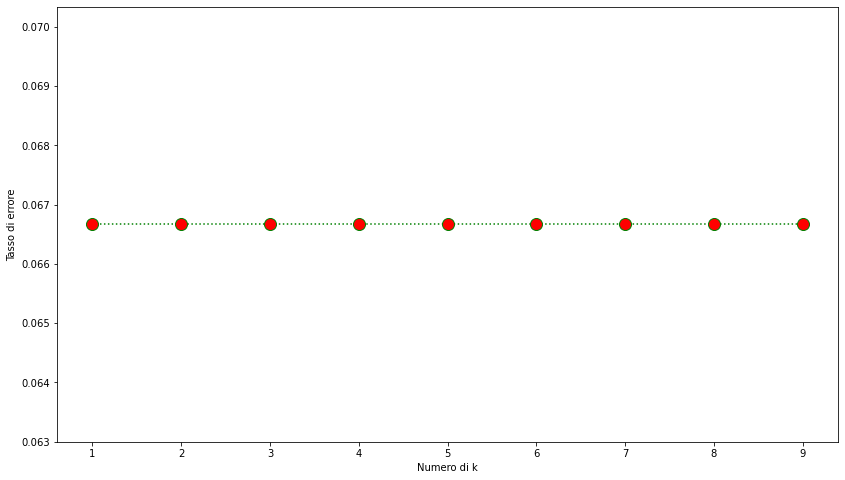

In [40]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, 10), err, color='green', linestyle='dotted', marker='o',
         markerfacecolor='red', markersize=12)
plt.xlabel('Numero di k')
plt.ylabel('Tasso di errore')

In [48]:
# cambiamo quindi il numero di k

In [49]:
knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0  0]
 [ 0 16  0]
 [ 0  3 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [50]:
knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0  0]
 [ 0 16  0]
 [ 0  3 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.79      0.88        14

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

